In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sindy_utils import sindy_library
from sklearn.model_selection import train_test_split
from scipy.integrate import odeint

The Rossler system is given by
$$\dot x = - z - y$$
$$\dot y = x + ay$$
$$\dot z = b + z(x-c)$$

I will solve the system using RK4 method for the parameters 
$$a = 0.15, b = 0.2, c = 10$$
 and the initial condition
$$(x,y,z)(t=0) = (10,0,0)$$
Taking the time step to be $h = \frac{\pi}{100}$ and the final time to be $t_{final} = 200$.

In [3]:
def Rossler(X, t, a, b, c):
    x, y, z = X
    return -y-z, x+a*y, b+z*(x-c)

def Hankel(x, delay):
    N = len(x)
    M = N - delay - 1
    hankel = np.zeros((delay, M))
    for i in range(delay):
        hankel[i, :] = x[i:i+M]
    return hankel

def TimeSeries(func, x0, t, a, b, c):
    return odeint(func, x0, t, args = (a,b,c)).T

I will add random noise to the obtained solutions.

In [4]:
a=0.15
b=0.2
c=10
h = np.pi/100
t = np.arange(0,200,h)
n = len(t)
x0 =[0,1,0]
xs,ys,zs = TimeSeries(Rossler, x0, t, a,b,c)

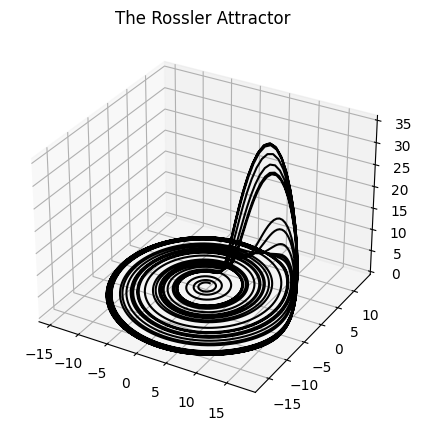

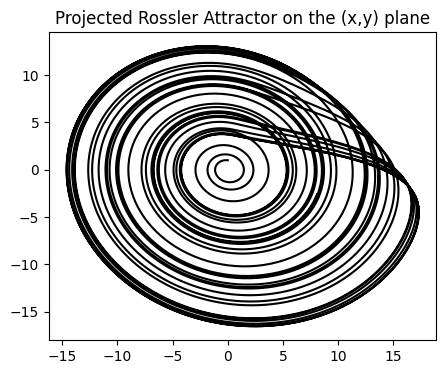

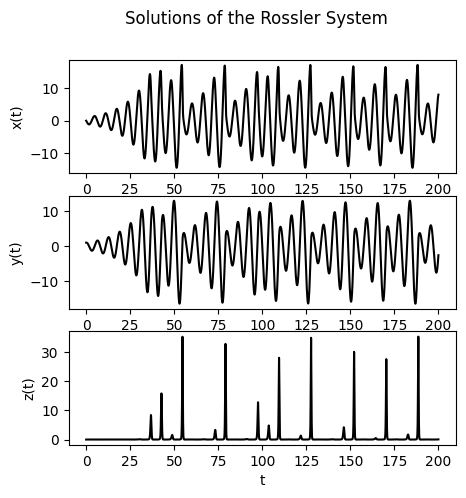

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection = '3d')
ax.plot(xs, ys,zs,color = 'k')
ax.set_title("The Rossler Attractor")
plt.show()

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
ax.plot(xs, ys,color = 'k')
ax.set_title("Projected Rossler Attractor on the (x,y) plane")
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(5, 5))    
ax1.plot(t,xs,color = 'k')
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t")
ax2.plot(t,ys,color = 'k')
ax2.set_ylabel("y(t)")
ax2.set_xlabel("t")
ax3.plot(t,zs,color = 'k')
ax3.set_ylabel("z(t)")
ax3.set_xlabel("t")
fig.suptitle("Solutions of the Rossler System")
plt.show()

## Mutual Information criterion.

In [6]:
def entropy(p):
    p_norm = p / np.sum(p)
    p_norm = p_norm[np.nonzero(p_norm)]
    S = -np.sum(p_norm* np.log(p_norm))  
    return S

def MI(X,Y,bins):
    p_XY = np.histogram2d(X,Y,bins)[0]
    p_X = np.histogram(X,bins)[0]
    p_Y = np.histogram(Y,bins)[0]
 
    S_X = entropy(p_X)
    S_Y = entropy(p_Y)
    S_XY = entropy(p_XY)
 
    MI = S_X + S_Y - S_XY
    return MI

[26, 36, 38, 40, 42, 46, 50, 52, 59, 62, 65, 68, 71, 74, 79, 100, 120, 123, 126, 130, 134, 138, 142, 145, 147, 149, 152, 159, 161, 164, 166, 168, 170, 173, 175, 178, 180, 200, 212, 217, 220, 222, 224, 226, 231, 236, 239, 241, 244, 249, 251, 253, 257, 261, 263, 266, 271, 273, 278, 282, 284, 289, 293]


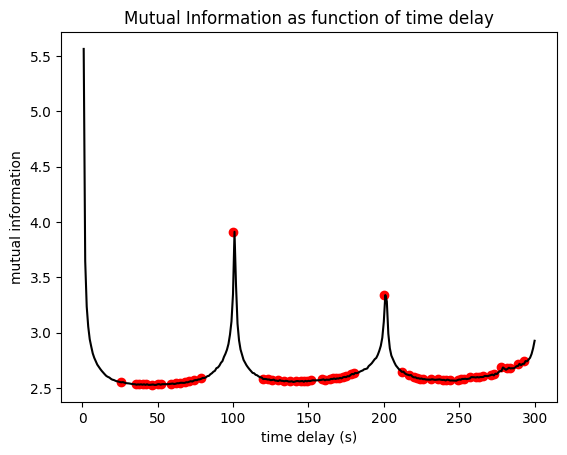

In [7]:
MI_vals = []
for i in range(300):
    v1 = xs[0:len(xs) - i]
    v2 = xs[i : len(xs)]
    MI_vals.append(MI(v1, v2, 300))

opt = []
opt_mi = []
for i in range(1, len(MI_vals)-1):
    if MI_vals[i] > MI_vals[i-1] and MI_vals[i] > MI_vals[i+1]:
        opt.append(i)
        opt_mi.append(MI_vals[i])
print(opt)

plt.plot(np.arange(1,len(MI_vals)+1), MI_vals, color = 'k')
plt.scatter(opt, opt_mi, color = 'r')
plt.xlabel('time delay (s)')
plt.ylabel('mutual information')
plt.title("Mutual Information as function of time delay")
plt.show()

## False Nearest Neighboors criteria.

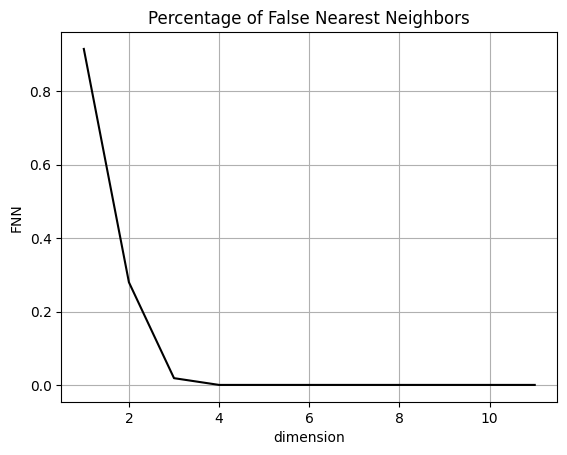

In [ ]:
eps = 0.5
tau = 25
n = len(xs)
per = []
k_vals = np.arange(1, 12)

for k in k_vals:
    FNN = 0
    NN = 0
    for i in range(n - (k * tau) - 1):
        for j in range(n- (k * tau) - 1):
            if j != i:
                if (eps - np.linalg.norm(xs[i] - xs[j])) > 0:
                  Rd = 0
                  for o in range(k):
                     Rd = Rd + (xs[i + (o - 1) * tau] - xs[j + (o - 1) * tau])**2
                  D = np.abs(xs[i + k * tau] - xs[j + k * tau])
                  if Rd != 0 and D/(np.sqrt(Rd)) >= 10:
                     FNN += 1
                  else:
                     NN += 1
    per.append((FNN/NN)*100)


plt.plot(k_vals, per, color = 'k')
plt.grid()
plt.title("Percentage of False Nearest Neighbors")
plt.ylabel("FNN")
plt.xlabel("dimension")
plt.show()

## The embedding.

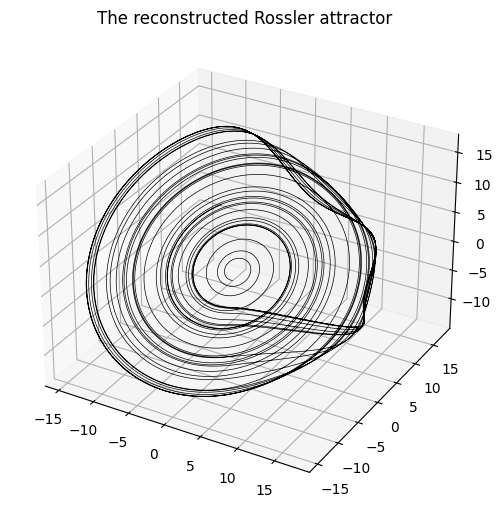

c:\Users\USAID\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.436e+02, tolerance: 2.487e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\USAID\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.618e+03, tolerance: 6.103e+00
  model = cd_fast.enet_coordinate_descent(


(3, 6307)
Score: 0.9553904143514842


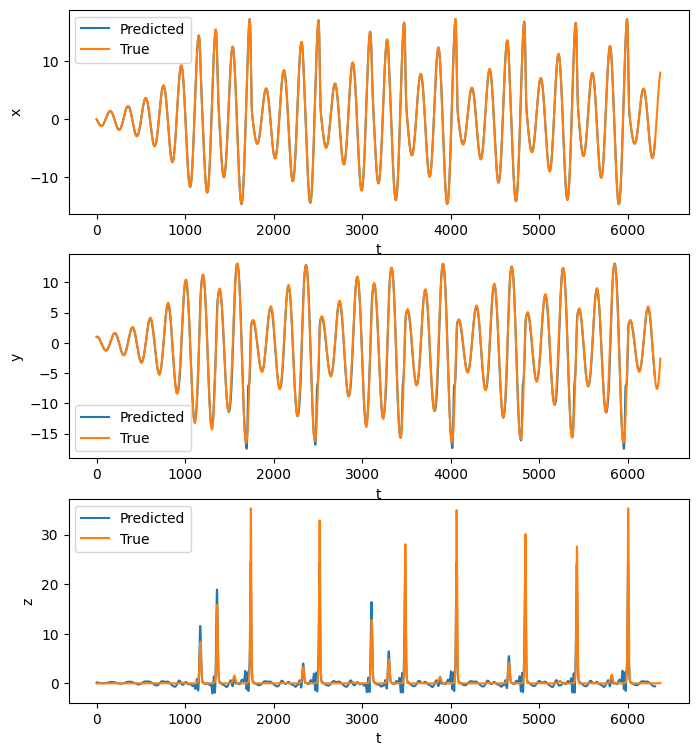

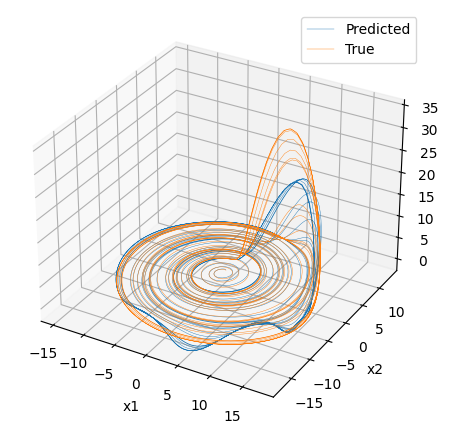

In [8]:
tau = 30

v1 = xs[0: len(xs) - 2*tau] #x(t)
v2 = xs[tau: len(xs) - tau] #x(t + τ)
v3 = xs[2*tau: len(xs)] #x(t + 2τ)

fig = plt.figure(figsize=(5,9)) 
ax = fig.add_subplot(111, projection='3d')

ax.plot(v1, v2, v3, lw=0.5, color = 'k')
plt.tight_layout()
plt.title("The reconstructed Rossler attractor")
plt.show()

v = np.array([v1, v2, v3]).T

X = sindy_library(v, 3, include_names=False, include_sine=False)

x = np.array([xs, ys, zs])
    
x_train, x_test, library_train, library_test = train_test_split(x[:, :X.shape[0]].T, X, test_size=0.2, random_state=0, shuffle=False)

model = Lasso(alpha=0.1, fit_intercept=False)
model.fit(library_train, x_train)
x_pred = model.predict(X).T

print(x_pred.shape)

# error = np.linalg.norm(x_pred - x_test.T)/np.linalg.norm(x_test.T)
score = model.score(library_test, x_test)
# print("Error:", error)
print("Score:", score)

fig1, ax = plt.subplots(3, 1, figsize=(8, 9))
fig2 = plt.figure(figsize=(13, 13))
ax3d = fig2.add_subplot(1, 3, 1, projection='3d')


ax[0].plot(x_pred[0], label='Predicted')
ax[0].plot(x[0], label='True')
ax[0].set_xlabel("t")
ax[0].set_ylabel("x")
ax[0].legend()

ax[1].plot(x_pred[1], label='Predicted')
ax[1].plot(x[1], label='True')
ax[1].set_xlabel("t")
ax[1].set_ylabel("y")
ax[1].legend()

ax[2].plot(x_pred[2], label='Predicted')
ax[2].plot(x[2], label='True')
ax[2].set_xlabel("t")
ax[2].set_ylabel("z")
ax[2].legend()
    
ax3d.plot(x_pred[0], x_pred[1], x_pred[2], lw=.3,label='Predicted')
ax3d.plot(x[0], x[1], x[2], lw=.3,label='True')
ax3d.set_xlabel("x1")
ax3d.set_ylabel("x2")
ax3d.set_zlabel("x3")
ax3d.legend()
plt.tight_layout()
plt.show()

c:\Users\USAID\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.814e+04, tolerance: 2.512e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\USAID\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+04, tolerance: 6.103e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\USAID\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

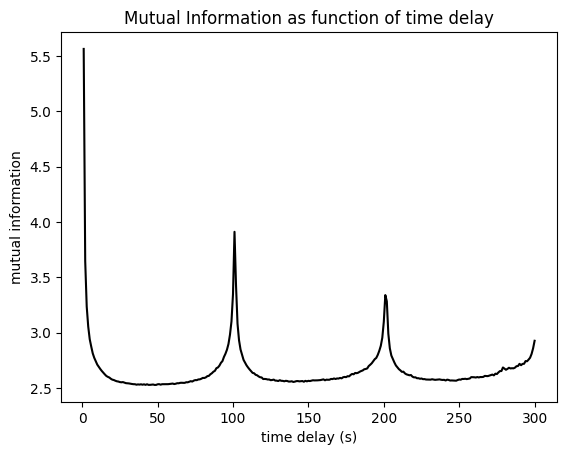

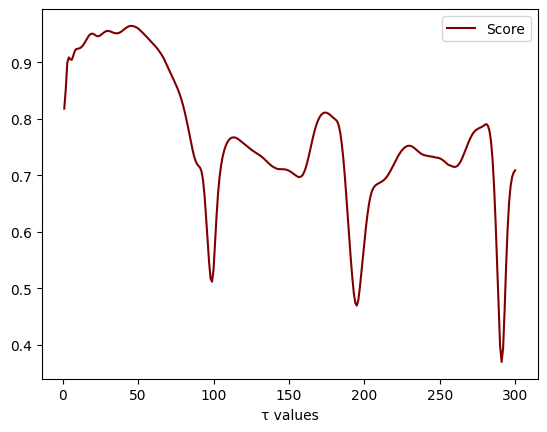

In [19]:
MI_vals = []

for i in range(300):
    v1 = xs[0:len(xs) - i]
    v2 = xs[i : len(xs)]
    MI_vals.append(MI(v1, v2, 300))

tau_vals = np.arange(1, len(MI_vals)+1)

score_vals = []
error_vals = []

for tau in range(1,len(MI_vals)+1):

    v1 = xs[0: len(xs) - 2*tau] #x(t)
    v2 = xs[tau: len(xs) - tau] #x(t + τ)
    v3 = xs[2*tau: len(xs)] #x(t + 2τ)

    v = np.array([v1, v2, v3]).T

    X = sindy_library(v, 3, include_names=False, include_sine=False)

    x = np.array([xs, ys, zs])
        
    x_train, x_test, library_train, library_test = train_test_split(x[:, :X.shape[0]].T, X, test_size=0.2, random_state=0, shuffle=False)

    model = Lasso(alpha=0.1, fit_intercept=False)
    model.fit(library_train, x_train)

    x_pred = model.predict(X).T

    # error = np.linalg.norm(x_pred - x_test.T)/np.linalg.norm(x_test.T)
    score = model.score(library_test, x_test)

    score_vals.append(score)
    # error_vals.append(error)


plt.plot(tau_vals, MI_vals, color = 'k')
plt.xlabel('time delay (s)')
plt.ylabel('mutual information')
plt.title("Mutual Information as function of time delay")
plt.show()

plt.plot(tau_vals, score_vals, label = "Score", color = 'maroon')
# plt.plot(tau_vals, error_vals, label = "Error", color = 'gray')
plt.xlabel("τ values")
plt.legend()
plt.show()

## Hankel matrix and SVD approach.

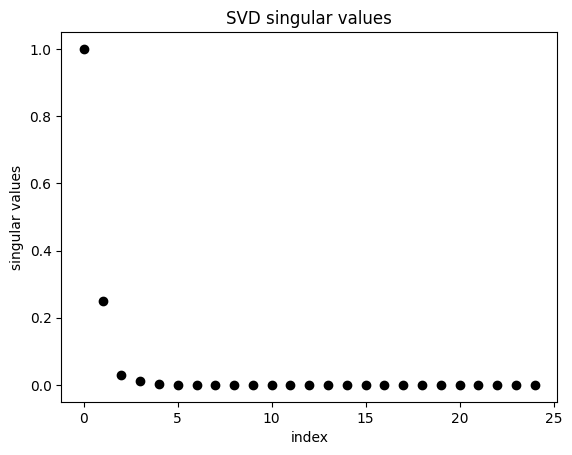

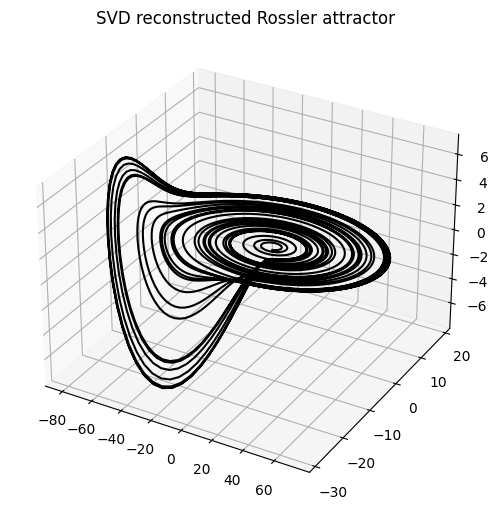

In [10]:
q = 25
n = len(xs) - q
H = np.zeros((q, n))
for i in range(q):
    H[i, :] = xs[i:i+n]
U, S, V= np.linalg.svd(H, full_matrices=False)
V = V.T

plt.scatter(np.arange(len(S)), S/S[0], color = 'k')
plt.ylabel("singular values")
plt.xlabel("index")

plt.title("SVD singular values")
plt.show()

# Plotting the first 3 columns of V scaled by the corresponding singular values
fig2 = plt.figure(figsize=(5,9))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot(V[:, 0]*S[0], V[:, 1]*S[1], V[:,2]*S[2], color = 'k')
plt.tight_layout()
plt.title("SVD reconstructed Rossler attractor")
plt.show()

## Fitting (SVD)

Error: 0.08950741017001915
Score: 0.9794758767968418


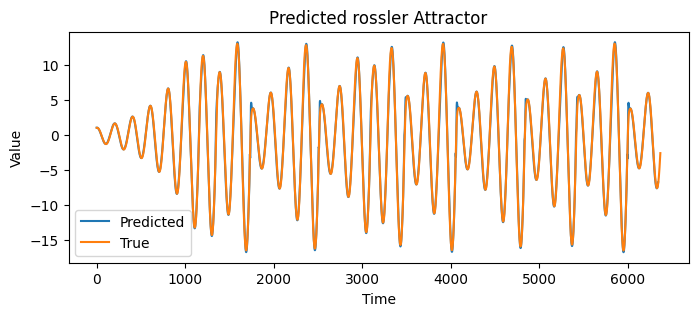

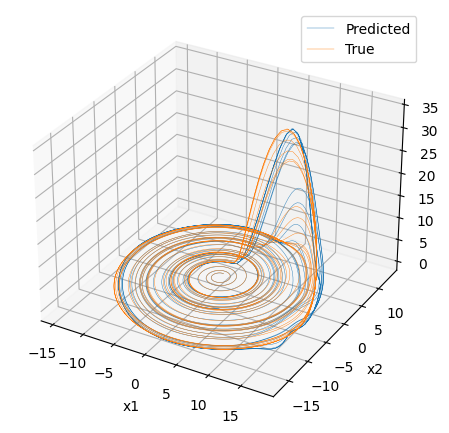

In [11]:
v = np.array([V[:, 0]*S[0], V[:, 1]*S[1], V[:,2]*S[2]]).T

X = sindy_library(v, 3, include_names=False, include_sine=False)

x = np.array([xs, ys, zs])
    
x_train, x_test, library_train, library_test = train_test_split(x[:, :X.shape[0]].T, X, test_size=0.2, random_state=0, shuffle=False)

model = Lasso(alpha=0.4, fit_intercept=False, max_iter=50000)
model.fit(X, x[:, :X.shape[0]].T)

x_pred = model.predict(X).T

error = np.linalg.norm(x_pred - x[:, :X.shape[0]])/np.linalg.norm(x[:, :X.shape[0]])
score = model.score(X, x[:, :X.shape[0]].T)
print("Error:", error)
print("Score:", score)

iend = 50000 

fig1, axes = plt.subplots(1, 1, figsize=(8, 3))
fig2 = plt.figure(figsize=(13, 13))
ax3d = fig2.add_subplot(1, 3, 1, projection='3d')


axes.plot(x_pred[1, :iend], label='Predicted')
axes.plot(x[1, :iend], label='True')
axes.set_title("Predicted rossler Attractor")
axes.set_xlabel("Time")
axes.set_ylabel("Value")
axes.legend()
    
ax3d.plot(x_pred[0, :iend], x_pred[1, :iend], x_pred[2, :iend], lw=.3,label='Predicted')
ax3d.plot(x[0, :iend], x[1, :iend], x[2, :iend], lw=.3,label='True')
ax3d.set_xlabel("x1")
ax3d.set_ylabel("x2")
ax3d.set_zlabel("x3")
ax3d.legend()
plt.tight_layout()
plt.show()